# Self-Driving Car Engineer Nanodegree
### Kevin Harrilal Project 2 Submission

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [15]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train[0].shape)
print("X_train_features shape:", X_train.shape)
print("y_train_labels shape:", y_train.shape)
print("X_test_features shape:", X_test.shape)
print("y_test_labels shape:", y_test.shape)
print("X_valid_features shape:", X_valid.shape)
print("y_valid_labels shape:", y_valid.shape)

(32, 32, 3)
X_train_features shape: (34799, 32, 32, 3)
y_train_labels shape: (34799,)
X_test_features shape: (12630, 32, 32, 3)
y_test_labels shape: (12630,)
X_valid_features shape: (4410, 32, 32, 3)
y_valid_labels shape: (4410,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [16]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

## Unmodified Traffic Sign Data

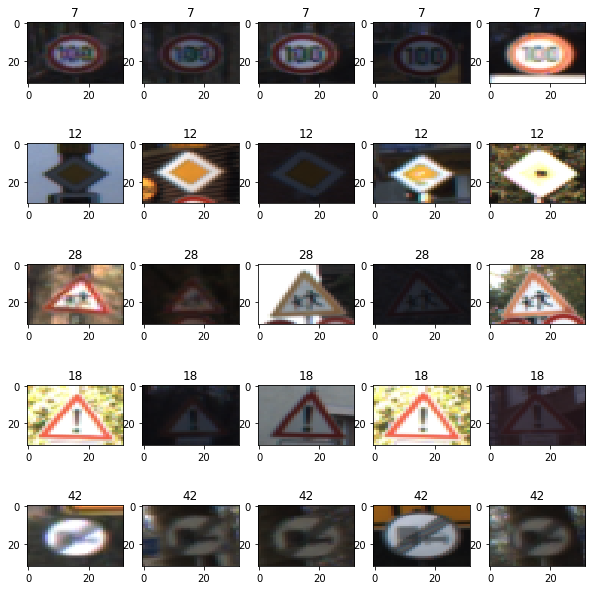

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# find 5 random classes in the dataset, we will use this to display random classes in a colum
i_range = random.sample(range(1, len(np.unique(y_train))), 5)
#print (i_range)

#create 5x5 subplot window
fig, ax = plt.subplots(5,5,figsize=(10, 10))
fig.subplots_adjust(hspace = 1)

#for each category, find random 5 indicies of their occurance, and plot the image
counter = 0
for each_category in i_range:
    feature_locations = np.where(y_train == each_category)[0]
    feature = np.random.choice(feature_locations, size=5, replace=False, p=None)
    for i, cat in enumerate(feature):
        image = X_train[cat]
        ax[counter,i].imshow(image, aspect='auto')
        ax[counter,i].set_title(y_train[cat])
    counter+=1

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [18]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle


#convert to grayscal by diving RGB values
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)
X_valid = np.sum(X_valid/3, axis=3, keepdims=True)


X_train, y_train = shuffle(X_train, y_train)

print("X_train_features shape:", X_train.shape)
print("y_train_labels shape:", y_train.shape)
print("X_test_features shape:", X_test.shape)
print("y_test_labels shape:", y_test.shape)
print("X_valid_features shape:", X_valid.shape)
print("y_valid_labels shape:", y_valid.shape)

X_train_features shape: (34799, 32, 32, 1)
y_train_labels shape: (34799,)
X_test_features shape: (12630, 32, 32, 1)
y_test_labels shape: (12630,)
X_valid_features shape: (4410, 32, 32, 1)
y_valid_labels shape: (4410,)


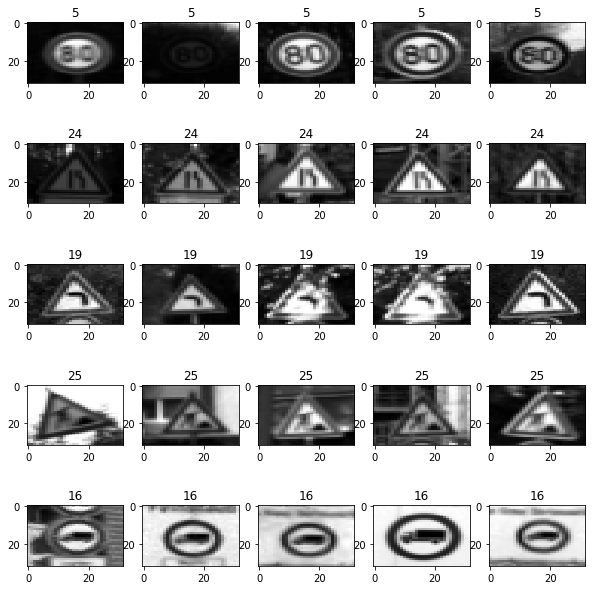

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotDataSetGRY (X_train, Y_train):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    # find 5 random classes in the dataset, we will use this to display random classes in a colum
    i_range = random.sample(range(1, len(np.unique(y_train))), 5)
    #print (i_range)

    #create 5x5 subplot window
    fig, ax = plt.subplots(5,5,figsize=(10, 10))
    fig.subplots_adjust(hspace = 1)

    #for each category, find random 5 indicies of their occurance, and plot the image
    counter = 0
    for each_category in i_range:
        feature_locations = np.where(y_train == each_category)[0]
        feature = np.random.choice(feature_locations, size=5, replace=False, p=None)
        for i, cat in enumerate(feature):
            #image = X_train[cat] #for rgb
            image = np.squeeze(X_train[cat]) #convert 32x32x1 to 32x32
            ax[counter,i].imshow(image, cmap='gray', aspect='auto')
            ax[counter,i].set_title(y_train[cat])
        counter+=1
        
plotDataSetGRY(X_train,y_train)        

## Normalize DataSet

Training Set X Mean Before Normalization 82.677589037
Test Set X Mean Before Normalization 82.1484603612
Training Set X Mean After Normalization 82.677589037
Test Set X Mean After Normalization 82.1484603612


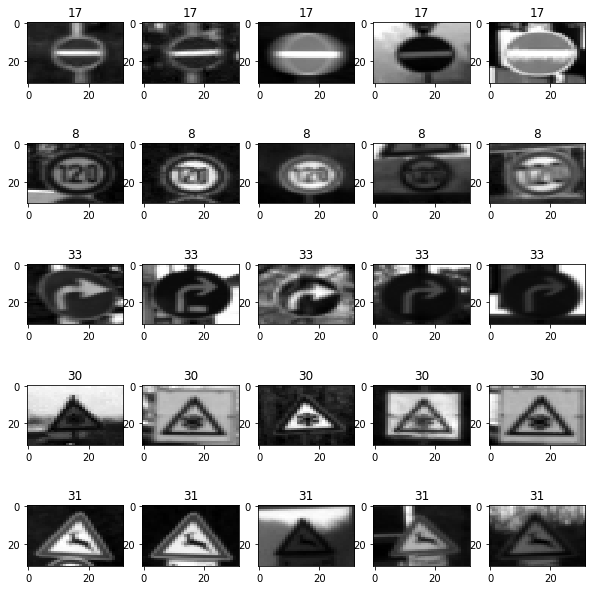

In [20]:
## Removed from pipeline as it reduced accuracy
print ("Training Set X Mean Before Normalization", np.mean(X_train))
print ("Test Set X Mean Before Normalization", np.mean(X_test))

#X_train = (X_train - 128)/128 
#X_test = (X_test - 128)/128

print("Training Set X Mean After Normalization",np.mean(X_train))
print("Test Set X Mean After Normalization",np.mean(X_test))

plotDataSetGRY(X_train,y_train)

## Investiagte number of data for each type of sign and generate fake Data
We can view the number of data for each type of sign using the histogram

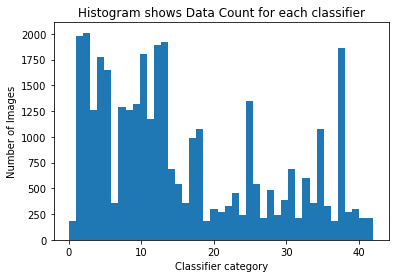

In [21]:
# histogram of label frequency
plt.hist(y_train, len(np.unique(y_train)))
plt.title("Histogram shows Data Count for each classifier")
plt.xlabel("Classifier category")
plt.ylabel("Number of Images")
plt.show()

From the above histogram we can see the data is heavily skewed. And many categories do not have a lot of Data.

(-0.5, 31.5, 31.5, -0.5)

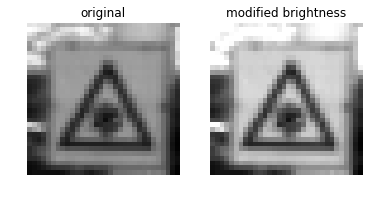

In [22]:
#OPEN CV Import Issue on AWS: https://github.com/udacity/sdc-issue-reports/issues/768
#run conda install opencv
import cv2
def modify_brightness(img):
    blank_image = np.zeros((32,32,1), np.uint8)
    alpha = random.uniform(0.9, 1.9)
    beta = random.uniform(5.0, 11.0)

    cv2.convertScaleAbs(img, blank_image, alpha, beta)
    return blank_image

#get random image to test function
index = random.randint(0, len(X_train))
random_image_original = X_train[index]

random_image_modify = modify_brightness(random_image_original)

#create 1x2 subplot window
fig, ax = plt.subplots(1,2)


ax[0].imshow(random_image_original.squeeze(), cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(random_image_modify.squeeze(), cmap='gray')
ax[1].set_title('modified brightness')
ax[1].axis('off')


## Add Fake Data
Using the Brightness function above, we take existing images, modify their brightness, and store it in the training set, until there are 500 of each image in each category

In [22]:
## FAKE DATA
#beginning shape
print('X, y shapes:', X_train.shape, y_train.shape)

X_train_aug = X_train
y_train_aug = y_train

# loop through each category to determine which ones have the least amount of datapoints
# augment the data so that every category has at least 500 datapoin ts
for category in range(n_classes):
    class_count = 0
    print(category, ': ', end='')
    feature_locations = np.where(y_train_aug == category)[0]
    class_count = len(feature_locations)
    if class_count < 500:
        print (class_count, sep='>>', end='', flush=True)
    while class_count < 500: #found sample that is less than 1000 datapoints
        # while the dataset is less than 500, choose 50 images in that dataset at random
        # run them through a function which randomizes its brightness, than add it
        # to the training dataset, keep doing this process until we have at least 1000 images
        # in that category then move on
        feature = np.random.choice(feature_locations, size=50, replace=False, p=None)
        for i in feature:
            new_img = X_train_aug[i]
            new_img = modify_brightness(new_img)
            X_train_aug = np.concatenate((X_train_aug, [new_img]), axis=0)
            y_train_aug = np.concatenate((y_train_aug, [category]), axis=0)
        class_count = len(np.where(y_train_aug == category)[0]) #update new count
        print("-", sep=' ', end='', flush=True) #print progress every 50
        
    # print out the final number of datapoints in that category   
    print(len(np.where(y_train_aug == category)[0]))   

#ending shape    
print('X, y shapes:', X_train_aug.shape, y_train_aug.shape)   

X, y shapes: (34799, 32, 32, 1) (34799,)
0 : 180-------530
1 : 1980
2 : 2010
3 : 1260
4 : 1770
5 : 1650
6 : 360---510
7 : 1290
8 : 1260
9 : 1320
10 : 1800
11 : 1170
12 : 1890
13 : 1920
14 : 690
15 : 540
16 : 360---510
17 : 990
18 : 1080
19 : 180-------530
20 : 300----500
21 : 270-----520
22 : 330----530
23 : 450-500
24 : 240------540
25 : 1350
26 : 540
27 : 210------510
28 : 480-530
29 : 240------540
30 : 390---540
31 : 690
32 : 210------510
33 : 599
34 : 360---510
35 : 1080
36 : 330----530
37 : 180-------530
38 : 1860
39 : 270-----520
40 : 300----500
41 : 210------510
42 : 210------510
X, y shapes: (39649, 32, 32, 1) (39649,)


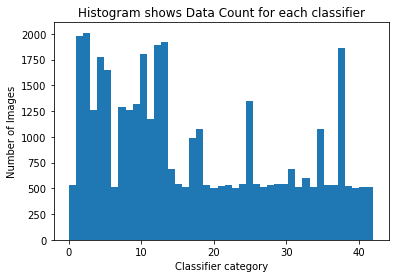

In [24]:
# histogram of label frequency
plt.hist(y_train_aug, len(np.unique(y_train)))
plt.title("Histogram shows Data Count for each classifier")
plt.xlabel("Classifier category")
plt.ylabel("Number of Images")
plt.show()

## Show Augmented Data

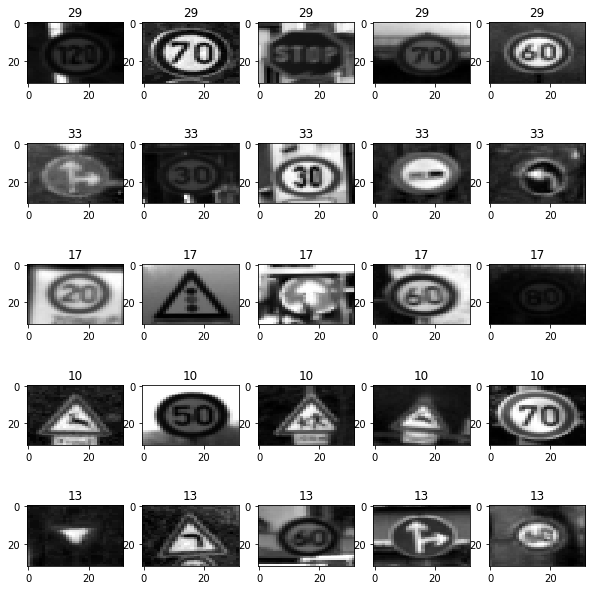

In [104]:
plotDataSetGRY(X_train_aug,y_train_aug)

In [ ]:
## Removed Augmented Data because it reduced performance
#X_train = X_train_aug
#y_train = y_train_aug

## Save Augmented Data

In [26]:

pickle.dump(X_train, open("X_train_augmented.p", 'wb'))
pickle.dump(y_train, open("y_train_augmented.p", 'wb'))

### Model Architecture
## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [2]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 180
DROP = 0.75

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, dropout_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [3]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
dropout_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)


rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)




## EValuation Function

In [4]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob : DROP})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train and Validate

In [15]:


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_prob: DROP})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.342

EPOCH 2 ...
Validation Accuracy = 0.586

EPOCH 3 ...
Validation Accuracy = 0.706

EPOCH 4 ...
Validation Accuracy = 0.781

EPOCH 5 ...
Validation Accuracy = 0.811

EPOCH 6 ...
Validation Accuracy = 0.819

EPOCH 7 ...
Validation Accuracy = 0.842

EPOCH 8 ...
Validation Accuracy = 0.857

EPOCH 9 ...
Validation Accuracy = 0.859

EPOCH 10 ...
Validation Accuracy = 0.872

EPOCH 11 ...
Validation Accuracy = 0.880

EPOCH 12 ...
Validation Accuracy = 0.881

EPOCH 13 ...
Validation Accuracy = 0.892

EPOCH 14 ...
Validation Accuracy = 0.895

EPOCH 15 ...
Validation Accuracy = 0.898

EPOCH 16 ...
Validation Accuracy = 0.898

EPOCH 17 ...
Validation Accuracy = 0.885

EPOCH 18 ...
Validation Accuracy = 0.904

EPOCH 19 ...
Validation Accuracy = 0.903

EPOCH 20 ...
Validation Accuracy = 0.901

EPOCH 21 ...
Validation Accuracy = 0.904

EPOCH 22 ...
Validation Accuracy = 0.914

EPOCH 23 ...
Validation Accuracy = 0.920

EPOCH 24 ...
Validation Accura

## Model Tuning Process
This section documents how I modified the model over time in order to achive improved accuracy. 

1. Implemented LeNet with only modification of chaning input to 3 channels, and output to 43 classifiers vs. 10 of the original LeNet Model. No modification to dataset other than shuffling pre-processing. Result after 15 EPOCH's 86.1% on Validation Set. This will act as a baseline

2. From Model above, changed images to greyscale from RGB, all other parameters stayed the same. Noticed that acter 15 EPOCH's, not a lot of gain was seen, so avoided increasing EPOCHs greater than 15. Results: 89.6% on validation set after 15 EPOCH's

3. Increased batch from 128 to 256: Results: 88.8% on validation set after 15 EPOCH's

4. Increased batch from 128 to 64: Results: 93.0% on validation set after 15 EPOCH's

5. Normalized Data Using X_train-128/128: Results 89.8% on validation set after 15 EPOCH's

6. Added Fake Data: Results 91.4% on validation set after 15 EPOCHs

7. Increased Batch from 64 to 128: 89.6%

8. Added Dropout layer between 4th and 5th layer after Relu: 90.0%

9. Removed Fake Data: 90.8%

10. Reduced Batch from 128 to 64: 93.5%

11. Reduced Batch from 64 to 32, increased EPOCH to 20: 89.5%

12. Increased Batch from 32 to 64, reduced learning rate from .001 to .0005: 90.1%

13. Removed Grey scale: 87.1%

14. Added Grayscale, added normalization: 81.8%

15. Removed Normalization, reduced dropout prob from 1.0 to 0.5: 79.9%

16. Increased learn rate from 0.0005 to 0.001: 88.2 %

17. Increased drop out to 1.0, increased epoch to 60: 89.6%

18. Increased batch from 64 to 100: 92.9%

19. Increased batch from 100 to 180, reduced dropout from 1.0 to 0.75: 95.2%

20. Increased batch from 180 to 350: 91.2%

21. Reduced batch from 350 to 210: 90.5% 

22. Reduced batch from 210, to 180, dropout from 0.75 to 0.5: 93.3%

23. Increased dropout from 0.5 to 0.75, reduced learning rate from .001 to .0008: 94.8%











## Test 

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

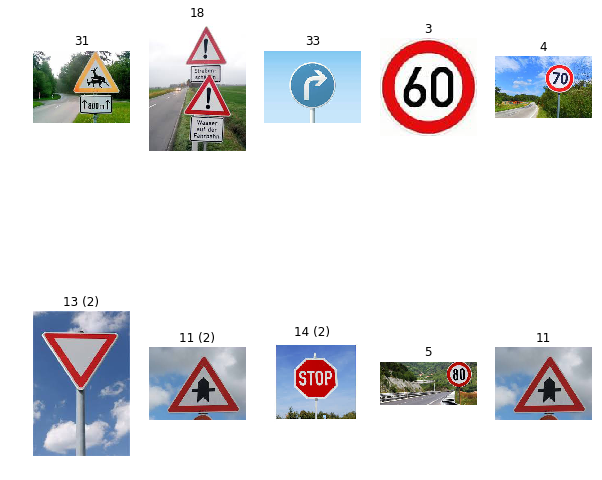

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, ax = plt.subplots(2,5, figsize=(10, 10))
ax = ax.ravel()

#print originals
for i, img in enumerate(glob.glob('my_internet_signs/*.jpg')):
    image = cv2.imread(img)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].axis('off')
    ax[i].set_title(str(img[18:-4])) #title is category of pic

In [24]:
## Convert Images to Gray Scale

(10, 32, 32, 1)


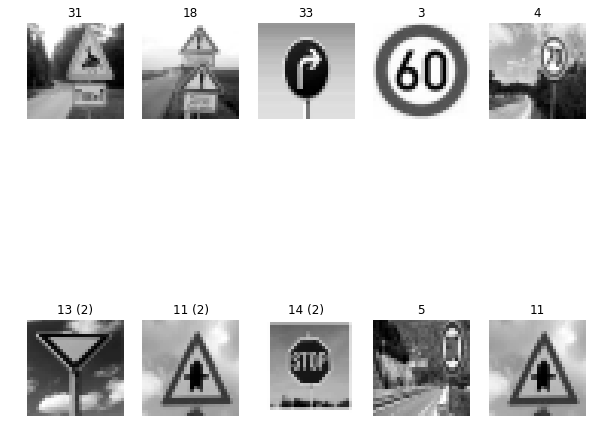

In [25]:
internet_images = []
fig, ax = plt.subplots(2,5, figsize=(10, 10))
ax = ax.ravel()
for i, img in enumerate(glob.glob('my_internet_signs/*.jpg')):
    image = cv2.imread(img)
    dim = (32, 32)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    image = np.sum(image/3, axis=2, keepdims=True)
    ax[i].imshow(image.squeeze(), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(str(img[18:-4])) #title is category of pic
    internet_images.append(image)

internet_images = np.asarray(internet_images)
print(internet_images.shape)

### Predict the Sign Type for Each Image

In [33]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

my_labels = [31,18,33,3,4,13,11,14,5,11]


### Analyze Performance

In [47]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    acc = evaluate(internet_images, my_labels)
    print("Test Set Accuracy = {:.3f}".format(acc))


Test Set Accuracy = 0.200


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [46]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    softmax_logits = sess.run(softmax_logits, feed_dict={x: internet_images, dropout_prob: DROP})
    top_k = sess.run(top_k, feed_dict={x: internet_images, dropout_prob: DROP})

    for i, label in enumerate(my_labels):
        print ("Input: ", label, "\tpredict",top_k[1][i][0],":", round(top_k[0][i][0]*100,2),("%"), \
               "\tpredict",top_k[1][i][1],":", round(top_k[0][i][1]*100,2), ("%"),\
               "\tpredict",top_k[1][i][2],":", round(top_k[0][i][2]*100,2),("%"))

Input:  31 	predict 23 : 77.37 % 	predict 20 : 17.78 % 	predict 25 : 1.85 %
Input:  18 	predict 11 : 91.64 % 	predict 34 : 6.56 % 	predict 9 : 1.78 %
Input:  33 	predict 32 : 57.71 % 	predict 1 : 11.35 % 	predict 9 : 10.18 %
Input:  3 	predict 1 : 100.0 % 	predict 5 : 0.0 % 	predict 3 : 0.0 %
Input:  4 	predict 17 : 100.0 % 	predict 12 : 0.0 % 	predict 40 : 0.0 %
Input:  13 	predict 21 : 97.24 % 	predict 29 : 0.97 % 	predict 35 : 0.3 %
Input:  11 	predict 11 : 100.0 % 	predict 27 : 0.0 % 	predict 1 : 0.0 %
Input:  14 	predict 40 : 99.79 % 	predict 12 : 0.21 % 	predict 23 : 0.0 %
Input:  5 	predict 40 : 100.0 % 	predict 12 : 0.0 % 	predict 11 : 0.0 %
Input:  11 	predict 11 : 100.0 % 	predict 27 : 0.0 % 	predict 21 : 0.0 %


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")